With SMOTE:
Average Accuracy: 0.79
Average Balanced Accuracy: 0.55
Average AUC: 0.59
[0.5625, 0.578125, 0.7877604166666667, 0.41666666666666674, 0.5416666666666666, 0.33333333333333337, 0.6589473684210526, 0.5757894736842105, 0.6452631578947368, 0.7557894736842106]


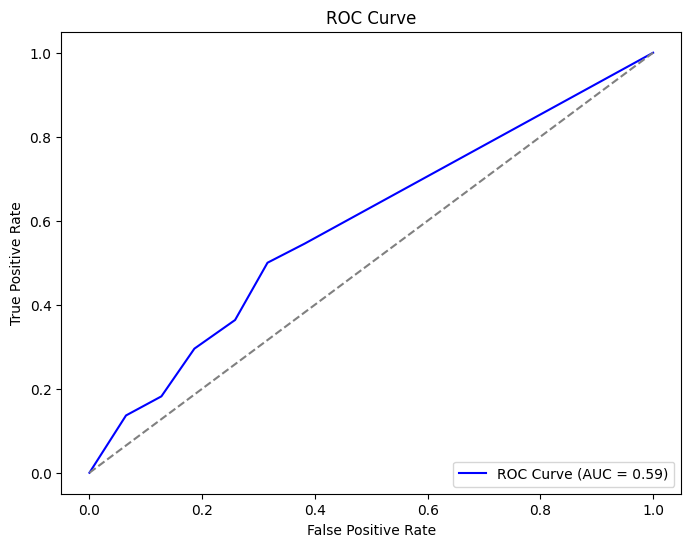

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

# Oversampling

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score, accuracy_score
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Create a complex and highly imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_clusters_per_class=2, weights=[0.98], flip_y=0.05,
                           class_sep=0.6, n_informative=2, n_redundant=10, random_state=42)

# Cross-validation setup
cross_validator = StratifiedKFold(n_splits=10)

# Metrics storage
metrics = {'accuracy': [], 'balanced_accuracy': [], 'auc': []}
all_true_values = []
all_predictions = []

# Model evaluation
for train_index, test_index in cross_validator.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    smote = SMOTE(random_state=42, k_neighbors=2)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    classifier = KNeighborsClassifier(n_neighbors=6)
    classifier.fit(X_train, y_train)

    test_predictions = classifier.predict(X_test)
    test_probabilities = classifier.predict_proba(X_test)[:, 1]

    all_true_values.extend(y_test)
    all_predictions.extend(test_probabilities)

    metrics['accuracy'].append(accuracy_score(y_test, test_predictions))
    metrics['balanced_accuracy'].append(balanced_accuracy_score(y_test, test_predictions))
    metrics['auc'].append(auc(*roc_curve(y_test, test_probabilities)[:2]))

# Average metrics calculation
avg_metrics = {k: np.mean(v) for k, v in metrics.items()}

# Metrics output
print("With SMOTE:")
print(f"Average Accuracy: {avg_metrics['accuracy']:.2f}")
print(f"Average Balanced Accuracy: {avg_metrics['balanced_accuracy']:.2f}")
print(f"Average AUC: {avg_metrics['auc']:.2f}")

print(metrics['auc'])

# Plot ROC curve
fpr, tpr, _ = roc_curve(all_true_values, all_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {avg_metrics["auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


With Random Under Sampling:
Average Accuracy: 0.62
Average Balanced Accuracy: 0.56
Average AUC: 0.61


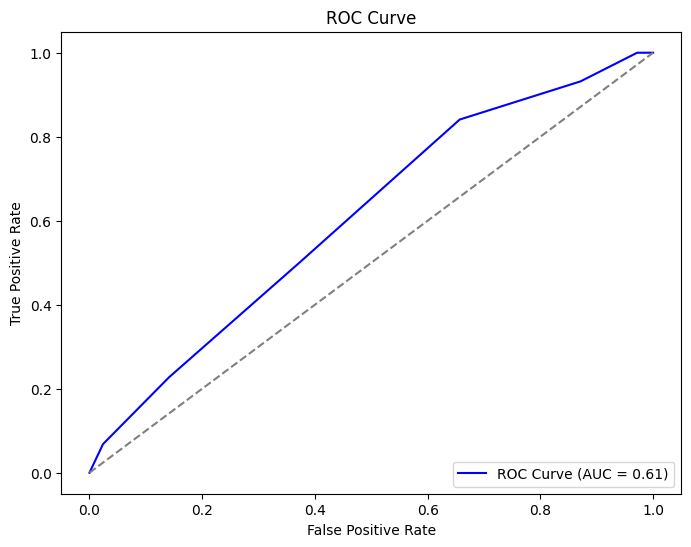

In [ ]:
# Undersampling

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score, accuracy_score
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler

# Create a complex and highly imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_clusters_per_class=2, weights=[0.98], flip_y=0.05,
                           class_sep=0.6, n_informative=2, n_redundant=10, random_state=42)

# Cross-validation setup
cross_validator = StratifiedKFold(n_splits=10)

# Metrics storage
metrics = {'accuracy': [], 'balanced_accuracy': [], 'auc': []}
all_true_values = []
all_predictions = []

# Model evaluation
for train_index, test_index in cross_validator.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply Random Under Sampling
    under_sampler = RandomUnderSampler(random_state=42)
    X_train, y_train = under_sampler.fit_resample(X_train, y_train)

    classifier = KNeighborsClassifier(n_neighbors=6)
    classifier.fit(X_train, y_train)

    test_predictions = classifier.predict(X_test)
    test_probabilities = classifier.predict_proba(X_test)[:, 1]

    all_true_values.extend(y_test)
    all_predictions.extend(test_probabilities)

    metrics['accuracy'].append(accuracy_score(y_test, test_predictions))
    metrics['balanced_accuracy'].append(balanced_accuracy_score(y_test, test_predictions))
    metrics['auc'].append(auc(*roc_curve(y_test, test_probabilities)[:2]))

# Average metrics calculation
avg_metrics = {k: np.mean(v) for k, v in metrics.items()}

# Metrics output
print("With Random Under Sampling:")
print(f"Average Accuracy: {avg_metrics['accuracy']:.2f}")
print(f"Average Balanced Accuracy: {avg_metrics['balanced_accuracy']:.2f}")
print(f"Average AUC: {avg_metrics['auc']:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(all_true_values, all_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {avg_metrics["auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
